In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("C:/Users/vikas/Desktop/Food-Truck.csv")

In [101]:
class Mocd:
    
    def mean_(self, x):
        sum = 0
        for ele in x:
            sum += ele
        mean = sum / len(x)
        return mean
    
    def standard_deviation(self, x):
        sd = 0
        m = self.mean_(x)
        for xi in x:
            sd += (xi - m)**2
        sd = sd/len(x)
        return sd
    
    def slope_(self,x,y):
        x_mean = self.mean_(x)
        y_mean = self.mean_(y)
        
        numerator = 0
        denominator = 0
        
        for xi, yi in zip(x,y):
            numerator += (xi-x_mean)*(yi-y_mean)
            denominator += (xi-x_mean)**2
        slope = 0
        slope = numerator/denominator
        return slope
    
    def intercept_(self, x,y):
        x_mean = self.mean_(x)
        y_mean = self.mean_(y)
        
        slope = self.slope_(x,y)
        intercept = y_mean - (slope * x_mean)
        return intercept
    
    def ssr_(self, x, y):
        ssr = 0
        y_pred = self.primitive_linear_regression(x,y)
        for yi, yi_cap in zip(y, y_pred):
            ssr += (yi - yi_cap)**2
        return ssr
    
    def sst_(self, x, y):
        sst = 0
        y_mean = self.mean_(y)
        for yi in y:
            sst += (yi - y_mean)**2
        return sst
    
    def r2_(self, x, y):
        r2 = 0
        ssr = self.ssr_(x,y)
        sst = self.sst_(x,y)
        
        r2 = 1 - (ssr / sst)
        return r2
    
    def primitive_linear_regression(self, x,y):
        y_pred = []
        m = self.slope_(x, y)
        c = self.intercept_(x, y)
        for xi in x:
            y_pred.append((m*xi) + c)
        return y_pred
    
    def summary_(self, x, y):
        print("-"*55)
        print("X Mean :", self.mean_(x))
        print("y Mean :", self.mean_(y))
        print("")
        print("X Standard Deviation :", self.standard_deviation(x))
        print("y Standard Deviation :", self.standard_deviation(y))
        print("")
        print("Slope :", self.slope_(x,y))
        print("Intercept :", self.intercept_(x,y))
        print("Sum squared error :", self.ssr_(x,y))
        print("Sum squared total :", self.sst_(x,y))
        print("coefficient of determination - R2 :", self.r2_(x,y))
        print("-"*55)        

In [45]:
df.head()

,Attribute,Label
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [46]:
X = df['Attribute']
y = df['Label']

In [102]:
obj = Mocd()
res = obj.r2_(X,y)
res

0.7020315537841398

In [207]:
obj.summary_(X,y)

-------------------------------------------------------
X Mean : 8.159800000000002
y Mean : 5.83913505154639

X Standard Deviation : 14.821606782061858
y Standard Deviation : 30.049969604713656

Slope : 1.193033644189594
Intercept : -3.8957808783118617
Sum squared error : 868.5324469391843
Sum squared total : 2914.8470516572247
coefficient of determination - R2 : 0.7020315537841398
-------------------------------------------------------


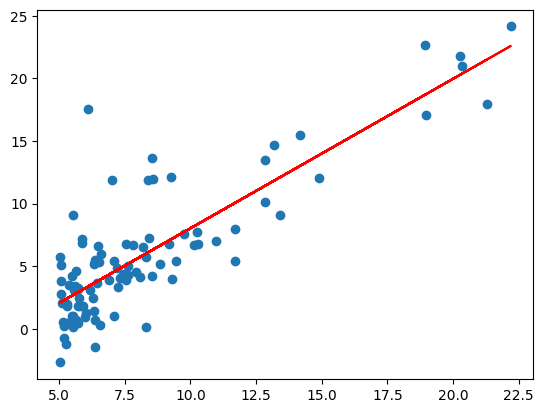

In [208]:
plt.scatter(X, y)
plt.plot(X, obj.primitive_linear_regression(X, y), c = 'red')
plt.show()

In [230]:
class LinearRegression :
    def __init__(self):
        self.m = 0
        self.c = 0
        self.m_values = []
        self.c_values = []
        self.epochs = 0
        self.y_pred = []
        self.loss_values = []
    
    
    def cost_function(self, x,y, para):
        summ = 0
        if para == 1 :
            for xi,yi in zip(x,y):
                summ = xi - yi
        else:
            for xi,yi in zip(x,y):
                summ = (self.predict_(xi) - yi)*xi
        
        summ = summ/len(x)
        return summ
    
    # def avgloss_(init_m, m, init_c, c):
    #     loss = 0
    #     loss = abs(((init_m - m) + (init_c - c))/2)
    #     return loss
    
    def gradient_descent(self, x, y, epochs=100, init_m = 0, init_c = 0, alpha = 0.01):
        self.epochs = epochs
        m = init_m
        c = init_c
        self.m_values.append(init_m)
        self.c_values.append(init_c)
        
        for i in range(epochs):
            m = m - (alpha * self.cost_function(x,y, 1))
            c = c - (alpha * self.cost_function (x,y, 0))
            self.m_values.append(m)
            self.c_values.append(c)
            self.loss_values.append(1 - abs(((init_m - m) + (init_c - c))/2))
            if(i % int(epochs/10) == 0):
                print("Loss :",abs(((init_m - m) + (init_c - c))/2))
        self.m = m
        self.c = c
        return self.m, self.c
    
    def compile_(self, x,y, epochs=100, alpha=0.01):
        y_pred = []
        self.gradient_descent(x, y, epochs, alpha)
        m = self.m
        c = self.c
        for xi in x:
            y_pred.append((m*xi) + c)
        self.y_pred = y_pred
    
    def predict_(self, x):
        ans = 0
        ans = self.m * x + self.c
        return ans
    
    def accuracy_(self, x, y):
        y_pred = self.predict_(x)
        mse = 0
        
        for yi, yi_cap in zip(y, y_pred):
            mse += (yi - yi_cap)**2
        mse = mse/len(y)
        
        print("Accuracy :", mse)
        return mse
    
    def summary_(self, x, y):
        obj = Mocd()
        print("-"*55)
        print("X Mean :", obj.mean_(x))
        print("y Mean :", obj.mean_(y))
        print("")
        print("X Standard Deviation :", obj.standard_deviation(x))
        print("y Standard Deviation :", obj.standard_deviation(y))
        print("")
        print("Slope :", self.m)
        print("Intercept :", self.c)
        print("Sum squared error :", obj.ssr_(x,y))
        print("Sum squared total :", obj.sst_(x,y))
        print("coefficient of determination - R2 :", obj.r2_(x,y))
        print("")
        print("Model Accuracy :", self.accuracy_(x, y))
        print("-"*55)
        print("\n")
        print("---------------GRAPHICAL REPORT--------------")
        plt.plot( list(range(0,self.epochs+1)),self.m_values, c = 'red')
        plt.plot( list(range(0,self.epochs+1)),self.c_values, c = 'blue')
        plt.plot( list(range(0,self.epochs)),self.loss_values, c = 'pink')
        plt.legend(["slope_m", "intercept_c","Loss"], loc ="upper left")
        plt.show()
        
        plt.scatter(x, y)
        plt.plot(x, self.y_pred)
        plt.show()

In [231]:
obj1 = LinearRegression()
obj1.compile_(X, y, epochs=10000, alpha = 0.001)

Loss : 7.551602345360822e-05
Loss : 0.07559153947706809
Loss : 0.15110756293065075
Loss : 0.2266235863842817
Loss : 0.30213960983796284
Loss : 0.37765563329153584
Loss : 0.45317165674510584
Loss : 0.528687680198676
Loss : 0.6042037036522461
Loss : 0.6797197271060269


-------------------------------------------------------
X Mean : 8.159800000000002
y Mean : 5.83913505154639

X Standard Deviation : 14.821606782061858
y Standard Deviation : 30.049969604713656

Slope : -4.967917525773253
Intercept : 3.458597056700523
Sum squared error : 868.5324469391843
Sum squared total : 2914.8470516572247
coefficient of determination - R2 : 0.7020315537841398

Accuracy : 2413.475791284966
Model Accuracy : 2413.475791284966
-------------------------------------------------------


---------------GRAPHICAL REPORT--------------


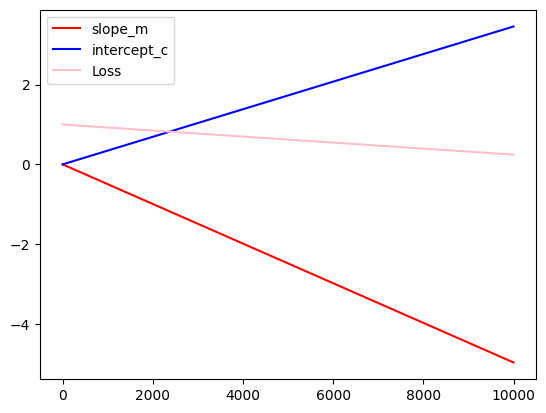

NameError: name 'plt2' is not defined

In [232]:
obj1.summary_(X,y)